# Manejo de base de **datos**

In [ ]:
pip install altair vega_datasets matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Primero importamos las librerías que nos servirán para el análisis

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(os.getcwd())

D:\Users\u_dae


También importamos la base de datos "Consolidado_vf" que incluye información sobre estudiantes admitidos a la PUCP

In [7]:
conso = pd.read_excel( "/content/Consolidado_vf.xlsx", sheet_name="BASE") 

In [8]:
conso.info() #reconocemos algunas características de las variables, entre ellas, el número de observaciones, su tipo y todos los nombres
#Es importante asegurarnos que las variables numéricas a priori tengan el tipo float o int (en lugar de object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 72 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Count                                                                  6937 non-null   object 
 1   Base_origen                                                            6937 non-null   object 
 2   ano_ciclo                                                              6937 non-null   object 
 3   Año Ingreso                                                            6937 non-null   int64  
 4   Escala                                                                 6937 non-null   object 
 5   Modalidad de ingreso                                                   6937 non-null   object 
 6   modalidad_jr                                                           6937 non-null   o

Los nombres de las variables también pueden visuralizarse con la siguiene expresión

In [30]:
conso.columns

Index(['Count', 'Base_origen', 'ano_ciclo', 'Año Ingreso', 'Escala ',
       'Modalidad de ingreso', 'modalidad_jr', 'unid_ingr', 'unid_ingr_jr',
       'especialidad', 'Grupo admisión', 'sexo', 'Edad', 'pais', 'region',
       'prov', 'dist', 'cod_cole', 'nom_cole', 'Tipo de \ncolegio', 'Segmento',
       'Colegio ITS', 'Colegio Bachillerato', 'Colegio COAR', 'ano_fin_secu',
       'Promedio escolar general (Considera curriculares y extracurriculares)',
       'Promedio 3ero a 5to (Curriculares)', 'ne_pro_gen_curr', 'ne_pro_mat',
       'ne_pro_com', 'ne_pro_ing', 'ne_pro_art', 'ne_pro_his', 'ne_pro_civ',
       'ne_pro_pfrh', 'ne_pro_edfis', 'ne_pro_rel', 'ne_pro_cta',
       'ne_pro_edtra', 'ne_pro_comport', 'ne_pro_3a5', 'ne_pro_otidio',
       'ne_pro_gesaut', 'ne_pro_dtic', 'PROMEDIO DE CURSO EXTRA 1',
       'PROMEDIO DE CURSO EXTRA 2', 'pa_pun_final', 'pa_pun_exam',
       'pa_pun_mat', 'pa_pun_lec', 'pa_pun_red', 'ne_pro_1a5', 'pa_pun_ne',
       'pa_pun_disc', 'pa_ord_mer', '

# Análisis **descriptivo**

<Figure size 1800x1080 with 0 Axes>

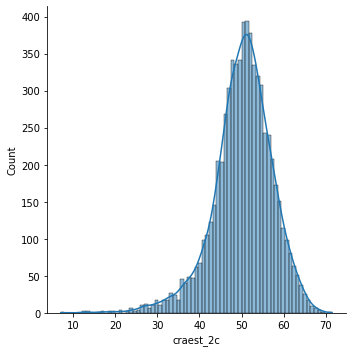

In [9]:
#Veamos como se distribuyen algunas variables, comenzando con el craest del segundo ciclo (consideramos los valores que sean mayores a cero)
filter_data = conso[conso['craest_2c']>0].dropna(subset=['craest_2c'])
plt.figure(figsize=(25,15))
sns.displot(filter_data['craest_2c'], kde=True)

<Figure size 1008x576 with 0 Axes>

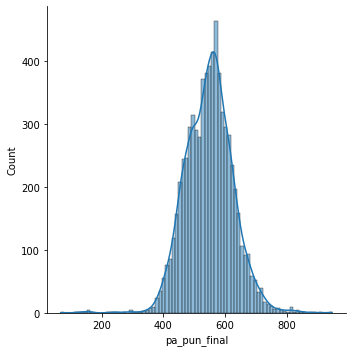

In [19]:
#Ahora un histograma del puntaje final en el examen de admisión
filter_data = conso.dropna(subset=['pa_pun_final'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['pa_pun_final'], kde=True)

<Figure size 1008x576 with 0 Axes>

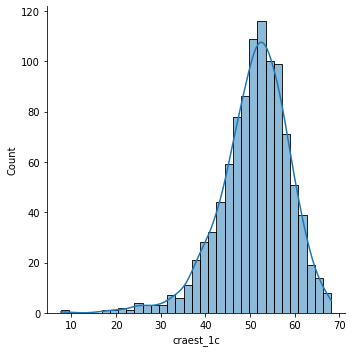

In [20]:
filter_data = conso.dropna(subset=['craest_1c'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['craest_1c'], kde=True)

In [21]:
conso.modalidad_jr.describe()
#la modalidad con más observaciones es ITS

count     6937
unique       8
top        ITS
freq      2961
Name: modalidad_jr, dtype: object

Es necesario establecer condicionantes para posteriormente analizar la data a nivel de unidad y de modalidad de admisión

In [10]:
#Establecemos condicionales para los ciclos
cond_2018_1 = conso['ano_ciclo']=="2018-1"
cond_2019_1 = conso['ano_ciclo']=="2019-1"
cond_2020_1 = conso['ano_ciclo']=="2020-1"
cond_2020_1 = conso['ano_ciclo']=="2021-1"

#Y también para los años
cond_2018= conso['Año Ingreso']=="2018"
cond_2019= conso['Año Ingreso']=="2019"
cond_2020 = conso['Año Ingreso']=="2020"
cond_2021 = conso['ano_ciclo']=="2021"

#por modalidad de admisión (no considero deportista ni IngBiom)
cond_acp = conso['modalidad_jr']== "ACP"
cond_exo = conso['modalidad_jr']== "Exonerado"
cond_its = conso['modalidad_jr']== "ITS"
cond_its_plus = conso['modalidad_jr']== "ITS Plus"
cond_po = conso['modalidad_jr']== "PO"
cond_talent = conso['modalidad_jr']== "Talento"

#Po unidad de ingreso
cond_egl= conso['unid_ingr_jr']=='EGL'
cond_egc= conso['unid_ingr_jr']=='EGC'
cond_fau= conso['unid_ingr_jr']=='FAU'

conso[cond_2019_1].head(10)

,Count,Base_origen,ano_ciclo,Año Ingreso,Escala,Modalidad de ingreso,modalidad_jr,unid_ingr,unid_ingr_jr,especialidad,...,n_cre_mat_2c,n_cre_ret_2c,n_cre_apro_2c,NUM. CREDITOS LLEVADOS hasta el 2do ciclo,%_cre_apro_2c,n_cre_ret_2ocai,n_cre_mat_2ocai,%_cre_apro_2ocai,craest_2c,ptil_2c
1,D2,ETyEX1921,2019-1,2019,G4,TALENTO,Talento,Estudios Generales Letras,EGL,ECONOMÍA,...,32.00,0.0,4.00,NaN,12.500000,0.00,32.00,12.500000,26.52,99.73
3,D4,ETyEX1921,2019-1,2019,G3,TALENTO,Talento,Estudios Generales Ciencias,EGC,INGENIERÍA MECATRÓNICA,...,39.75,4.5,19.75,NaN,49.685535,4.50,35.25,56.028369,46.97,73.68
5,D6,ETyEX1921,2019-1,2019,G4,TALENTO,Talento,Estudios Generales Letras,EGL,DERECHO,...,30.00,0.0,7.00,NaN,23.333333,0.00,30.00,23.333333,34.02,98.83
7,D8,ETyEX1921,2019-1,2019,G3,TALENTO,Talento,Estudios Generales Letras,EGL,ECONOMÍA,...,36.00,0.0,12.00,NaN,33.333333,0.00,36.00,33.333333,43.92,82.40
8,D9,ETyEX1921,2019-1,2019,G2,TALENTO,Talento,Estudios Generales Ciencias,EGC,INGENIERÍA DE MINAS,...,38.75,0.0,34.25,NaN,88.387097,0.00,38.75,88.387097,55.32,21.05
10,D11,ETyEX1921,2019-1,2019,G6,TALENTO,Talento,Estudios Generales Ciencias,EGC,INGENIERÍA DE MINAS,...,39.50,0.0,0.75,NaN,1.898734,19.75,19.75,3.797468,37.36,97.33
11,D12,ETyEX1921,2019-1,2019,G9,TALENTO,Talento,Estudios Generales Letras,EGL,ECONOMÍA,...,40.00,0.0,32.00,NaN,80.000000,0.00,40.00,80.000000,46.56,66.90
12,D13,ETyEX1921,2019-1,2019,G3,TALENTO,Talento,Estudios Generales Ciencias,EGC,INGENIERÍA CIVIL,...,41.75,0.0,0.75,NaN,1.796407,0.00,41.75,1.796407,28.85,99.44
13,D14,ETyEX1921,2019-1,2019,G3,TALENTO,Talento,Estudios Generales Ciencias,EGC,INGENIERÍA ELECTRÓNICA,...,40.75,0.0,25.25,NaN,61.963190,0.00,40.75,61.963190,44.95,85.28
14,D15,ETyEX1921,2019-1,2019,G2,TALENTO,Talento,Estudios Generales Letras,EGL,LINGÜÍSTICA Y LITERATURA,...,31.00,0.0,8.00,NaN,25.806452,0.00,31.00,25.806452,34.12,98.77


Podemos estimar las correlaciones entre dos variables espefícias

In [23]:
conso['craest_1c'].corr(conso['craest_2c']) #Lo que es equivalente a conso.craest_1c.corr(conso.craest_2c)

0.899696220246675

De hecho, también podemos calcular la correlación de todas las variables en el dataframe (conso) con la variable "craest_2c"

In [11]:
conso[cond_exo & cond_egc].corrwith(conso.craest_2c)

Año Ingreso                                                              0.134476
Edad                                                                          NaN
ano_fin_secu                                                             0.144732
Promedio escolar general (Considera curriculares y extracurriculares)         NaN
Promedio 3ero a 5to (Curriculares)                                            NaN
ne_pro_gen_curr                                                          0.303549
ne_pro_mat                                                               0.263015
ne_pro_com                                                               0.198073
ne_pro_ing                                                               0.265543
ne_pro_art                                                               0.200524
ne_pro_his                                                               0.236839
ne_pro_civ                                                               0.176224
ne_pro_pfrh     

#### También estamos interesado en la visualización de la relación entre variables 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


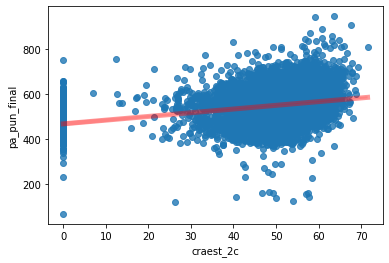

In [46]:
sns.regplot('craest_2c', 'pa_pun_final', line_kws={"color":"r","alpha":0.4,"lw":5}, data=conso)

La anterior gráfica puede mostrar una relación más precisa si acotamos el rango de 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Asociación entre craest_2c y pa_pun_final')

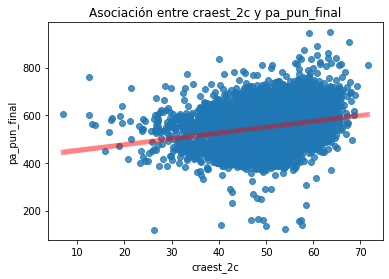

In [12]:
sns.regplot('craest_2c', 'pa_pun_final', line_kws={"color":"r","alpha":0.4,"lw":5}, data=conso[conso.craest_2c>0])
plt.title('Asociación entre %s y %s' % ('craest_2c', 'pa_pun_final'))

Podemos mostrar la relación entre el rendimiento académico y el conjunto de variables de admisión

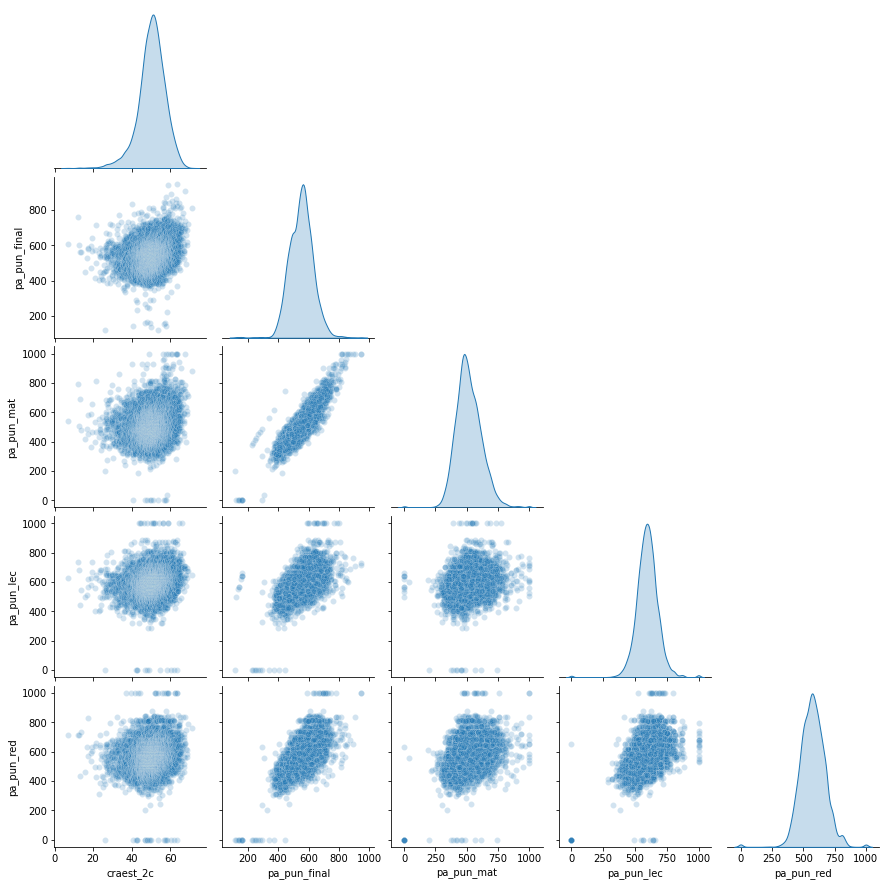

In [13]:
sns.pairplot(conso[['craest_2c','pa_pun_final', 'pa_pun_mat', 'pa_pun_lec','pa_pun_red']][conso.craest_2c>0], diag_kind='kde', plot_kws={'alpha': 0.2}, corner=True)

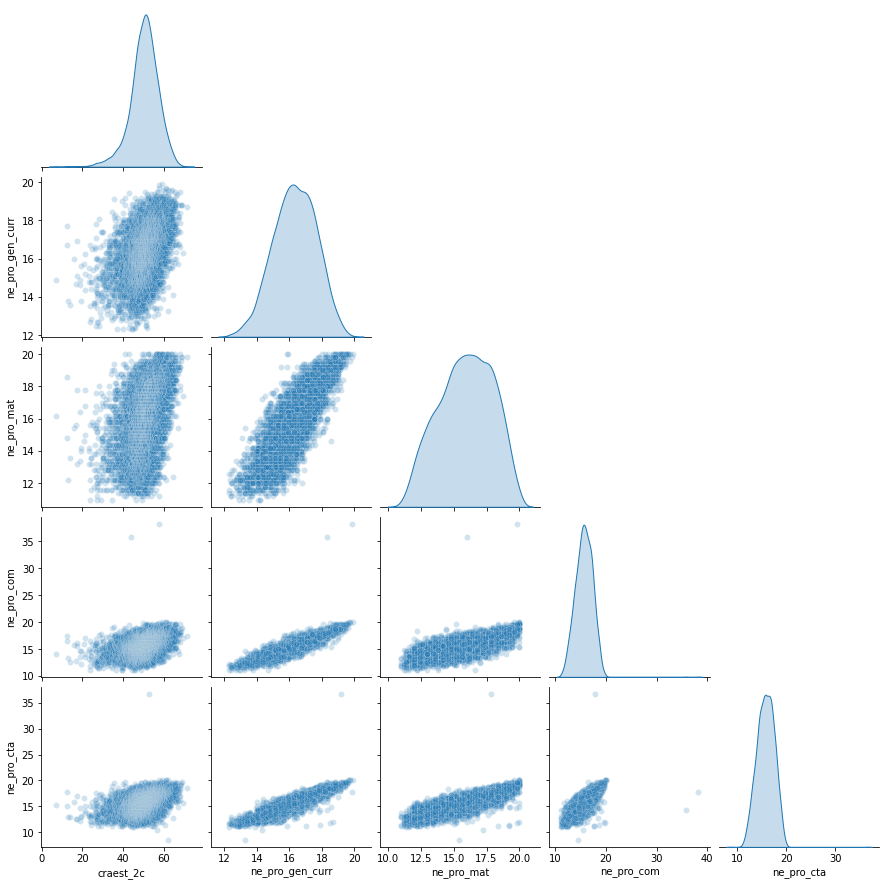

In [62]:
sns.pairplot(conso[['craest_2c','ne_pro_gen_curr', 'ne_pro_mat', 'ne_pro_com','ne_pro_cta']][conso.craest_2c>0], diag_kind='kde', plot_kws={'alpha': 0.2}, corner=True)

# EGC - ITS
Num. observation: 1440


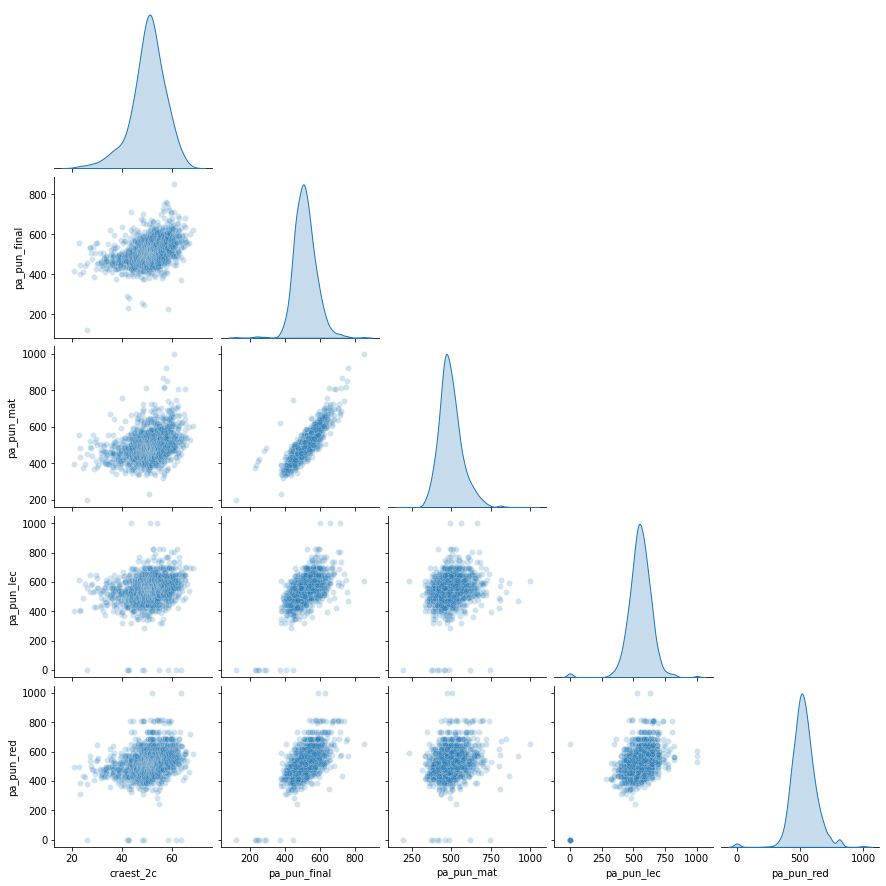

In [27]:
conso_craest_0 = conso_egcits.craest_2c>0
conso_egcits = conso[cond_egc & cond_its & conso_craest_0] 
sns.pairplot(conso_egcits[['craest_2c','pa_pun_final', 'pa_pun_mat', 'pa_pun_lec','pa_pun_red']], diag_kind='kde', plot_kws={'alpha': 0.2}, corner=True)

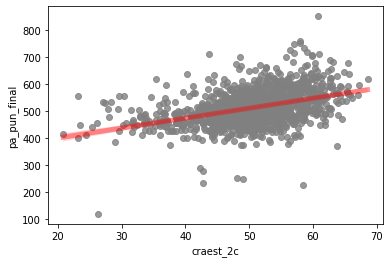

In [28]:
sns.regplot(x=conso_egcits["craest_2c"], y=conso_egcits["pa_pun_final"], scatter_kws={"color": "grey"}, line_kws={"color":"r","alpha":0.4,"lw":5})
plt.show()

# EGL - ITS

Num.observaciones: 1447


In [ ]:
conso_craest_0 = conso_egcits.craest_2c>0
conso_egcits = conso[cond_egl & cond_its & conso_craest_0] 
sns.pairplot(conso_egcits[['craest_2c','pa_pun_final', 'pa_pun_mat', 'pa_pun_lec','pa_pun_red']], diag_kind='kde', plot_kws={'alpha': 0.2}, corner=True)

In [ ]:
conso.describe()

,Año Ingreso,Edad,ano_fin_secu,Promedio escolar general (Considera curriculares y extracurriculares),Promedio 3ero a 5to (Curriculares),ne_pro_gen_curr,ne_pro_mat,ne_pro_com,ne_pro_ing,ne_pro_art,...,n_cre_mat_2c,n_cre_ret_2c,n_cre_apro_2c,NUM. CREDITOS LLEVADOS hasta el 2do ciclo,%_cre_apro_2c,n_cre_ret_2ocai,n_cre_mat_2ocai,%_cre_apro_2ocai,craest_2c,ptil_2c
count,6937.000000,3979.000000,6821.000000,5684.000000,5908.000000,6880.000000,6880.000000,6880.000000,6880.000000,6879.000000,...,6821.000000,6821.000000,6821.000000,5792.000000,6821.000000,1029.000000,1029.000000,6637.000000,6810.000000,6812.000000
mean,2019.683148,19.272933,2018.437912,16.314039,16.397027,16.307050,15.884327,15.657687,16.153452,16.880566,...,38.151188,0.408738,31.044202,37.456362,80.607154,0.868805,37.744898,81.044415,49.008943,45.691196
std,1.068823,0.994150,1.299163,1.357615,1.364184,1.316297,2.027587,1.688399,1.741774,1.377238,...,4.462606,2.046488,10.798553,5.499076,25.802157,3.426609,6.718413,25.596483,10.508744,30.453037
min,2018.000000,17.000000,2006.000000,0.000000,11.878788,12.300000,11.000000,11.000000,11.000000,9.400000,...,14.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,19.000000,2018.000000,15.000000,15.468750,15.400000,14.400000,14.400000,15.000000,16.000000,...,37.000000,0.000000,25.750000,36.750000,68.944099,0.000000,36.750000,69.230769,46.170000,19.520000
50%,2020.000000,19.000000,2018.000000,16.000000,16.451613,16.300000,16.000000,15.600000,16.200000,17.000000,...,39.000000,0.000000,35.000000,38.750000,89.743590,0.000000,38.750000,89.743590,50.540000,42.370000
75%,2021.000000,20.000000,2020.000000,17.000000,17.387823,17.300000,17.600000,16.800000,17.400000,17.800000,...,41.000000,0.000000,38.750000,40.750000,100.000000,0.000000,41.000000,100.000000,54.630000,71.082500
max,2021.000000,24.000000,2020.000000,20.000000,19.939394,19.900000,20.000000,38.200000,20.000000,38.800000,...,142.000000,23.500000,94.250000,45.000000,176.666667,39.500000,142.000000,176.666667,71.510000,100.000000


Podemos generar una matriz de correlaciones para todas las variables (numéricas)

In [31]:
corr_matrix = conso.corr(method='pearson')
corr_matrix

,Año Ingreso,Edad,ano_fin_secu,Promedio escolar general (Considera curriculares y extracurriculares),Promedio 3ero a 5to (Curriculares),ne_pro_gen_curr,ne_pro_mat,ne_pro_com,ne_pro_ing,ne_pro_art,...,n_cre_mat_2c,n_cre_ret_2c,n_cre_apro_2c,NUM. CREDITOS LLEVADOS hasta el 2do ciclo,%_cre_apro_2c,n_cre_ret_2ocai,n_cre_mat_2ocai,%_cre_apro_2ocai,craest_2c,ptil_2c
Año Ingreso,1.000000,-0.807615,0.833564,0.109408,0.113875,0.113242,0.048149,0.074641,0.058901,0.088078,...,-0.080026,-0.008313,0.054780,-0.117553,0.055457,-0.029795,0.089078,0.095464,-0.105490,-0.101937
Edad,-0.807615,1.000000,-0.868268,-0.122640,-0.131024,-0.117543,-0.068787,-0.107107,-0.092532,-0.105996,...,-0.085699,0.019408,-0.194192,-0.092933,-0.186028,NaN,NaN,-0.188536,-0.001162,0.070365
ano_fin_secu,0.833564,-0.868268,1.000000,0.190649,0.205273,0.239325,0.146597,0.180629,0.155507,0.206455,...,-0.082052,-0.040157,0.074042,-0.106294,0.085949,-0.125737,0.097458,0.115141,-0.080832,-0.127716
Promedio escolar general (Considera curriculares y extracurriculares),0.109408,-0.122640,0.190649,1.000000,0.913127,0.940056,0.787640,0.862004,0.733455,0.711087,...,0.127230,-0.033165,0.259800,0.117603,0.236955,NaN,NaN,0.252202,0.248087,-0.415122
Promedio 3ero a 5to (Curriculares),0.113875,-0.131024,0.205273,0.913127,1.000000,0.958740,0.814247,0.883039,0.763934,0.714707,...,0.152049,-0.034930,0.285273,0.138874,0.258550,NaN,NaN,0.276560,0.280725,-0.440762
ne_pro_gen_curr,0.113242,-0.117543,0.239325,0.940056,0.958740,1.000000,0.843920,0.901876,0.796606,0.731159,...,0.131439,-0.030960,0.259199,0.136476,0.235843,-0.006350,0.052684,0.248817,0.274844,-0.417569
ne_pro_mat,0.048149,-0.068787,0.146597,0.787640,0.814247,0.843920,1.000000,0.762824,0.663589,0.514055,...,0.171990,-0.018223,0.226266,0.155860,0.183367,-0.020194,0.099529,0.192038,0.268849,-0.400946
ne_pro_com,0.074641,-0.107107,0.180629,0.862004,0.883039,0.901876,0.762824,1.000000,0.735733,0.600454,...,0.121287,-0.026384,0.250334,0.129933,0.232371,-0.020555,0.046388,0.241269,0.272183,-0.382133
ne_pro_ing,0.058901,-0.092532,0.155507,0.733455,0.763934,0.796606,0.663589,0.735733,1.000000,0.500840,...,0.116436,-0.024935,0.237716,0.124765,0.221259,0.027958,0.012192,0.236681,0.255593,-0.357225
ne_pro_art,0.088078,-0.105996,0.206455,0.711087,0.714707,0.731159,0.514055,0.600454,0.500840,1.000000,...,0.078175,-0.026633,0.173878,0.093855,0.161662,-0.020226,0.046121,0.177826,0.173592,-0.267745


Ahora bien, hay una forma de ordenar los coeficientes de correlación

In [32]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
1198,pa_ord_mer_exo,pa_ord_mer,1.000000,1.000000
1159,pa_ord_mer,pa_ord_mer_exo,1.000000,1.000000
1112,pa_pun_ne,ne_pro_1a5,1.000000,1.000000
1074,ne_pro_1a5,pa_pun_ne,1.000000,1.000000
855,pa_pun_final,pa_pun_exam,0.983562,0.983562
...,...,...,...,...
1513,n_cre_ret_2c,ne_pro_edfis,-0.000352,0.000352
1518,n_cre_ret_2c,PROMEDIO DE CURSO EXTRA 1,0.000172,0.000172
794,PROMEDIO DE CURSO EXTRA 1,n_cre_ret_2c,0.000172,0.000172
1222,n_cre_mat_1c,ne_pro_his,-0.000110,0.000110


Podemos aplicar diversos filtros para estimar matrices de correlación específicas para unidades y modalidades.


---


A nivel de unidad:
*   Estudios Generales **Ciencias**: cond_egc
*   Estudios Generales **Letras**: cond_egl
*   Facultad de **Arquitectura** y Urbanismo: cond_fau


---


A nivel de modalidad:
*   ACP: cond_acp
*   Talento: cond_talent
*   ITS: cond_its
*   Exonerado: cond_exo
*   PO: cond_po



---












In [34]:
from scipy.stats import pearsonr
rho = conso[cond_egl].corr()
pval = conso[cond_egl].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Año Ingreso,Edad,ano_fin_secu,Promedio escolar general (Considera curriculares y extracurriculares),Promedio 3ero a 5to (Curriculares),ne_pro_gen_curr,ne_pro_mat,ne_pro_com,ne_pro_ing,ne_pro_art,...,n_cre_mat_2c,n_cre_ret_2c,n_cre_apro_2c,NUM. CREDITOS LLEVADOS hasta el 2do ciclo,%_cre_apro_2c,n_cre_ret_2ocai,n_cre_mat_2ocai,%_cre_apro_2ocai,craest_2c,ptil_2c
Año Ingreso,1.0***,-0.79***,0.84***,0.17***,0.16***,0.15***,0.1***,0.1***,0.08***,0.11***,...,0.04**,-0.04**,0.13***,0.01,0.11***,-0.03,0.1**,0.15***,-0.04**,-0.11***
Edad,-0.79***,1.0***,-0.85***,-0.15***,-0.14***,-0.13***,-0.1***,-0.12***,-0.09***,-0.11***,...,-0.08***,0.06***,-0.17***,-0.12***,-0.15***,nan,nan,-0.17***,-0.05**,0.09***
ano_fin_secu,0.84***,-0.85***,1.0***,0.24***,0.24***,0.26***,0.18***,0.2***,0.16***,0.21***,...,0.01,-0.08***,0.14***,0.02,0.14***,-0.11**,0.02,0.17***,-0.01,-0.13***
Promedio escolar general (Considera curriculares y extracurriculares),0.17***,-0.15***,0.24***,1.0***,0.91***,0.94***,0.78***,0.85***,0.69***,0.69***,...,0.12***,-0.06***,0.29***,0.13***,0.28***,nan,nan,0.3***,0.3***,-0.44***
Promedio 3ero a 5to (Curriculares),0.16***,-0.14***,0.24***,0.91***,1.0***,0.95***,0.8***,0.87***,0.72***,0.71***,...,0.14***,-0.07***,0.32***,0.15***,0.31***,nan,nan,0.33***,0.33***,-0.48***
ne_pro_gen_curr,0.15***,-0.13***,0.26***,0.94***,0.95***,1.0***,0.84***,0.91***,0.76***,0.71***,...,0.1***,-0.08***,0.3***,0.14***,0.3***,-0.07,0.05,0.31***,0.33***,-0.46***
ne_pro_mat,0.1***,-0.1***,0.18***,0.78***,0.8***,0.84***,1.0***,0.77***,0.64***,0.47***,...,0.1***,-0.04**,0.23***,0.11***,0.22***,-0.09*,0.09*,0.23***,0.28***,-0.41***
ne_pro_com,0.1***,-0.12***,0.2***,0.85***,0.87***,0.91***,0.77***,1.0***,0.71***,0.59***,...,0.11***,-0.06***,0.29***,0.14***,0.29***,-0.06,0.06,0.3***,0.33***,-0.43***
ne_pro_ing,0.08***,-0.09***,0.16***,0.69***,0.72***,0.76***,0.64***,0.71***,1.0***,0.45***,...,0.07***,-0.06***,0.25***,0.12***,0.26***,-0.05,0.02,0.27***,0.28***,-0.39***
ne_pro_art,0.11***,-0.11***,0.21***,0.69***,0.71***,0.71***,0.47***,0.59***,0.45***,1.0***,...,0.07***,-0.06***,0.21***,0.1***,0.21***,-0.04,0.03,0.22***,0.21***,-0.28***


In [ ]:
g = sns.PairGrid(conso, hue="modalidad_jr")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Análisis de Base Unificada

In [3]:
uni = pd.read_excel(r'G:\LABURO\DAE\Metodología\base_unificada_admi.xlsx', sheet_name='DATA')
uni.head(13)

,ID,CICLO,YEAR,NACIONALIDAD,EDAD,MODALIDAD DE INGRESO,NOMBRE DEL PROCESO,UNIDAD DE INGRESO,ESPECIALIDAD DE INGRESO,ETAPA DE INGRESO,...,Nª CRED APROB 3er ciclo,%Cred Aprob hasta el 3er Ciclo,CRAEst hasta el 3er Ciclo,Percentil hasta el 3er Ciclo,Nª CRED MAT 4to ciclo,Nª CRED RET 4to ciclo,Nª CRED APROB 4to ciclo,%Cred Aprob hasta el 4to Ciclo,CRAEst hasta el 4to Ciclo,Percentil hasta el 4to Ciclo
0,EST000001,2010-1,2010,PERU,31,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,FÍSICA,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,84.25,111.960133,64.82,1.35,95.25,0.00,104.25,109.448819,62.90,3.06
1,EST000002,2010-1,2010,PERU,32,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,FÍSICA,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EST000003,2010-1,2010,PERU,28,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,34.00,60.714286,46.04,80.26,77.25,0.00,41.50,53.721683,41.90,93.47
3,EST000004,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,31.00,81.578947,48.03,67.04,38.00,0.00,31.00,81.578947,NaN,NaN
4,EST000005,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,37.50,64.102564,41.24,94.00,58.50,0.00,37.50,64.102564,NaN,NaN
5,EST000006,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,36.50,53.090909,43.50,90.16,90.00,9.25,43.50,48.333333,43.86,89.73
6,EST000007,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,55.25,79.211470,47.92,67.84,92.75,0.00,78.25,84.366577,48.25,65.24
7,EST000008,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,27.75,46.250000,46.97,74.65,78.50,0.00,36.75,46.815287,46.74,76.81
8,EST000009,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,60.25,95.256917,51.34,42.42,84.75,0.00,77.25,91.150442,49.12,58.00
9,EST000010,2010-1,2010,PERU,29,EVALUACIÓN DEL TALENTO Y EXONERADOS,EVALUACIÓN DEL TALENTO Y EXONERADOS 2010-1,Estudios Generales Ciencias,INGENIERÍA CIVIL,PREGRADO EN EEGG O FORMACIÓN GENERAL,...,60.50,92.720307,46.60,76.99,77.25,0.00,67.50,87.378641,46.10,80.53


In [4]:
uni.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39150 entries, 0 to 39149
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              39150 non-null  object 
 1   CICLO                           39150 non-null  object 
 2   YEAR                            39150 non-null  int64  
 3   NACIONALIDAD                    39150 non-null  object 
 4   EDAD                            39150 non-null  int64  
 5   MODALIDAD DE INGRESO            39150 non-null  object 
 6   NOMBRE DEL PROCESO              39150 non-null  object 
 7   UNIDAD DE INGRESO               39150 non-null  object 
 8   ESPECIALIDAD DE INGRESO         39150 non-null  object 
 9   ETAPA DE INGRESO                39150 non-null  object 
 10  GRUPO DE ADMISIÓN               39150 non-null  object 
 11  SEXO                            39150 non-null  object 
 12  PAÍS DE RESIDENCIA              

In [5]:
uni.columns

Index(['ID', 'CICLO', 'YEAR', 'NACIONALIDAD', 'EDAD', 'MODALIDAD DE INGRESO',
       'NOMBRE DEL PROCESO', 'UNIDAD DE INGRESO', 'ESPECIALIDAD DE INGRESO',
       'ETAPA DE INGRESO', 'GRUPO DE ADMISIÓN', 'SEXO', 'PAÍS DE RESIDENCIA',
       'PROVINCIA DE RESIDENCIA', 'DISTRITO DE RESIDENCIA', 'ESCALA',
       'CÓDIGO DE COLEGIO', 'NOMBRE DEL COLEGIO', 'TIPO DE COLEGIO',
       'AÑO FIN COLEGIO', 'PUNTAJE FINAL', 'PUNTAJE MATEMATICA',
       'PUNTAJE LECTURA', 'PUNTAJE REDACCION OBJETIVA', 'BONIFICACION NOTAS',
       'BONIFICACION DISCAPACIDAD', 'ORDEN MERITO', 'ORDEN MERITO EXONERADO',
       'TOTAL POSTULANTES GRUPO', 'PERCENTIL REND. EX. ADM.',
       'Nª CRED MAT 1er ciclo', 'Nª CRED RET 1er ciclo',
       'Nª CRED APROB 1er ciclo', '%Cred Aprobados 1er Ciclo',
       'CRAEst 1er Ciclo', 'Percentil del 1er Ciclo', 'Nª CRED MAT 2do ciclo',
       'Nª CRED RET 2do ciclo', 'Nª CRED APROB 2do ciclo',
       '%Cred Aprob hasta el 2do Ciclo', 'CRAEst hasta el 2do Ciclo',
       'Percentil

Será necesario definir una serie de filtros para analizar la correlación de los resultados craest por unidad y canal. Ahora bien, como se observa en el siguiente cuadro, no todas las modalidades de admisión ni todas las unidades cuentan con suficientes observaciones como para estimar correlaciones significativas. 



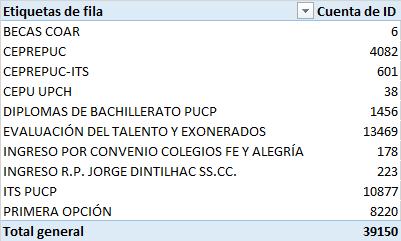


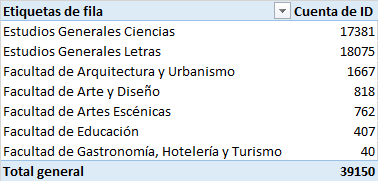

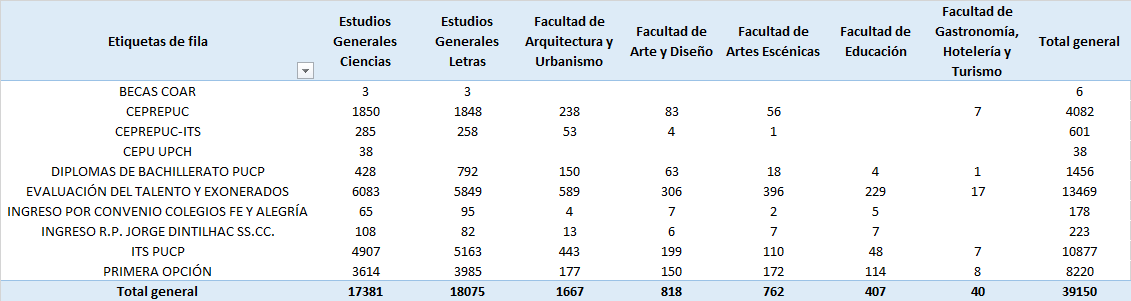

Esto nos empuja a concentrarnos inicialmente en las siguientes modalidades:
* CEPREPUC
* CEPREPUC-ITS
* DIPLOMAS DE BACHILLERATO PUCP
* EVALUACIÓN DEL TALENTO Y EXONERADOS
* ITS PUCP
* PRIMERA OPCIÓN

Y en las siguientes unidades: 

* Estudios Generales Letras
* Estudios Generales Ciencias
* Facultad de Arquitectura y Urbanismo

In [6]:
#por modalidad de admisión
cond_cepre = uni['MODALIDAD DE INGRESO']== "CEPREPUC"
cond_cepre_its = uni['MODALIDAD DE INGRESO']== "CEPREPUC-ITS"
cond_ib = uni['MODALIDAD DE INGRESO']== "DIPLOMAS DE BACHILLERATO PUCP"
cond_talent_exo = uni['MODALIDAD DE INGRESO']== "EVALUACIÓN DEL TALENTO Y EXONERADOS"
cond_its = uni['MODALIDAD DE INGRESO']== "ITS PUCP"
cond_po= uni['MODALIDAD DE INGRESO']== "PRIMERA OPCIÓN"

#Po unidad de ingreso
cond_egl= uni['UNIDAD DE INGRESO']=='Estudios Generales Letras'
cond_egc= uni['UNIDAD DE INGRESO']=='Estudios Generales Ciencias'
cond_fau= uni['UNIDAD DE INGRESO']=='Facultad de Arquitectura y Urbanismo'

#Según año de registro
cond_2011= uni['YEAR']==2011
cond_2012= uni['YEAR']==2012
cond_2013= uni['YEAR']==2013
cond_2014= uni['YEAR']==2014
cond_2015= uni['YEAR']==2015
cond_2016= uni['YEAR']==2016
cond_2017= uni['YEAR']==2017
cond_2018= uni['YEAR']==2018
cond_2019= uni['YEAR']==2019
cond_2020= uni['YEAR']==2020
cond_2021= uni['YEAR']==2021
cond_2022= uni['YEAR']==2022

In [7]:
uni_craest= uni[['CRAEst 1er Ciclo','CRAEst hasta el 2do Ciclo','CRAEst hasta el 3er Ciclo','CRAEst hasta el 4to Ciclo','UNIDAD DE INGRESO','MODALIDAD DE INGRESO']]
uni_craest.head(3)

,CRAEst 1er Ciclo,CRAEst hasta el 2do Ciclo,CRAEst hasta el 3er Ciclo,CRAEst hasta el 4to Ciclo,UNIDAD DE INGRESO,MODALIDAD DE INGRESO
0,65.69,66.07,64.82,62.9,Estudios Generales Ciencias,EVALUACIÓN DEL TALENTO Y EXONERADOS
1,38.56,NaN,NaN,NaN,Estudios Generales Ciencias,EVALUACIÓN DEL TALENTO Y EXONERADOS
2,40.49,43.04,46.04,41.9,Estudios Generales Ciencias,EVALUACIÓN DEL TALENTO Y EXONERADOS


Será relevante calcular el número de missing por cada variable

In [9]:
uni_craest.isna().sum()

CRAEst 1er Ciclo               409
CRAEst hasta el 2do Ciclo     4355
CRAEst hasta el 3er Ciclo     8182
CRAEst hasta el 4to Ciclo    12105
UNIDAD DE INGRESO                0
MODALIDAD DE INGRESO             0
dtype: int64

<AxesSubplot:xlabel='index'>

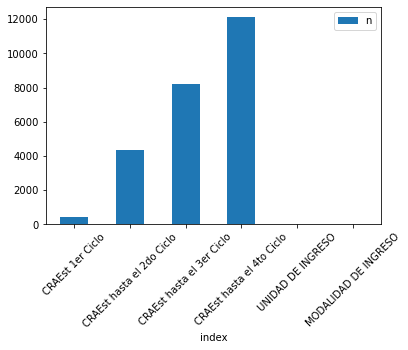

In [11]:
uni_craest.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)
#Parece que la base tiene una alta atrición

In [13]:
uni_craest.shape

(39150, 6)

In [23]:
uni_craest2 =uni_craest
uni_craest2.dropna(subset=['CRAEst hasta el 3er Ciclo','CRAEst hasta el 4to Ciclo'])
uni_craest2.shape

(39150, 6)

In [57]:
from scipy.stats import pearsonr
rho = uni_craest[cond_fau & cond_po].corr()
pval = uni_craest[cond_fau & cond_po].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,CRAEst 1er Ciclo,CRAEst hasta el 2do Ciclo,CRAEst hasta el 3er Ciclo,CRAEst hasta el 4to Ciclo
CRAEst 1er Ciclo,1.0***,0.89***,0.57***,0.6***
CRAEst hasta el 2do Ciclo,0.89***,1.0***,0.91***,0.88***
CRAEst hasta el 3er Ciclo,0.57***,0.91***,1.0***,0.96***
CRAEst hasta el 4to Ciclo,0.6***,0.88***,0.96***,1.0***


Ahora estudiemos la correlación entre las variables de admisión y el rendimiento de los estudiantes una vez que ingresaron a la universidad, específicamente, a la Facultad de Arquitectura y Urbanismo (FAU)

In [58]:
craest_admi= uni[['CRAEst 1er Ciclo','CRAEst hasta el 2do Ciclo','CRAEst hasta el 3er Ciclo','CRAEst hasta el 4to Ciclo','UNIDAD DE INGRESO','MODALIDAD DE INGRESO','PUNTAJE FINAL', 'PUNTAJE MATEMATICA',
       'PUNTAJE LECTURA', 'PUNTAJE REDACCION OBJETIVA']]
craest_admi.head(3)

,CRAEst 1er Ciclo,CRAEst hasta el 2do Ciclo,CRAEst hasta el 3er Ciclo,CRAEst hasta el 4to Ciclo,UNIDAD DE INGRESO,MODALIDAD DE INGRESO,PUNTAJE FINAL,PUNTAJE MATEMATICA,PUNTAJE LECTURA,PUNTAJE REDACCION OBJETIVA
0,65.69,66.07,64.82,62.9,Estudios Generales Ciencias,EVALUACIÓN DEL TALENTO Y EXONERADOS,592.2,660.3,435.8,632.4
1,38.56,NaN,NaN,NaN,Estudios Generales Ciencias,EVALUACIÓN DEL TALENTO Y EXONERADOS,567.9,542.1,545.4,575.9
2,40.49,43.04,46.04,41.9,Estudios Generales Ciencias,EVALUACIÓN DEL TALENTO Y EXONERADOS,515.2,542.1,406.1,455.1


In [61]:
from scipy.stats import pearsonr
rho = craest_admi[cond_fau & cond_its].corr()
pval = craest_admi[cond_fau & cond_its].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,CRAEst 1er Ciclo,CRAEst hasta el 2do Ciclo,CRAEst hasta el 3er Ciclo,CRAEst hasta el 4to Ciclo,PUNTAJE FINAL,PUNTAJE MATEMATICA,PUNTAJE LECTURA,PUNTAJE REDACCION OBJETIVA
CRAEst 1er Ciclo,1.0***,0.9***,0.86***,0.85***,0.23***,0.14***,0.21***,0.27***
CRAEst hasta el 2do Ciclo,0.9***,1.0***,0.95***,0.93***,0.22***,0.12**,0.21***,0.28***
CRAEst hasta el 3er Ciclo,0.86***,0.95***,1.0***,0.97***,0.22***,0.18***,0.19***,0.23***
CRAEst hasta el 4to Ciclo,0.85***,0.93***,0.97***,1.0***,0.21***,0.18***,0.17***,0.2***
PUNTAJE FINAL,0.23***,0.22***,0.22***,0.21***,1.0***,0.91***,0.79***,0.76***
PUNTAJE MATEMATICA,0.14***,0.12**,0.18***,0.18***,0.91***,1.0***,0.56***,0.51***
PUNTAJE LECTURA,0.21***,0.21***,0.19***,0.17***,0.79***,0.56***,1.0***,0.56***
PUNTAJE REDACCION OBJETIVA,0.27***,0.28***,0.23***,0.2***,0.76***,0.51***,0.56***,1.0***


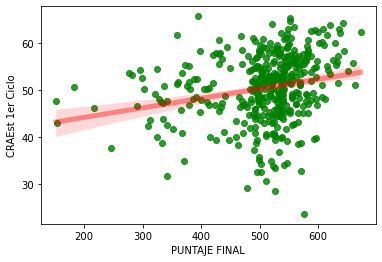

In [62]:
sns.regplot(x=craest_admi[cond_fau & cond_its]["PUNTAJE FINAL"], y=craest_admi[cond_fau & cond_its]["CRAEst 1er Ciclo"], scatter_kws={"color": "green"}, line_kws={"color":"r","alpha":0.4,"lw":5})
plt.show()

# Test de medias 

La fuente principal para el código de esta sección es la siguiente pagina: https://www.cienciadedatos.net/documentos/pystats10-t-test-python.html

Dos muestras se consideran independientes si las observaciones se han obtenido de forma aleatoria y no guardan relación unas con otras. Las hipótesis contrastadas por el t-test de muestras independientes son:

* H0 : no hay diferencias entre las medias:  μx=μy 
* Ha : sí hay diferencias entre las medias:  μx≠μy

El estadístico del t-test para muestras independientes es:

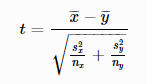

In [64]:
pip install pingouin #utilizaremos esta librería para el t-test

  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196207 sha256=dc00329f9c003c4ac158b06c3842052e606130e29481c44ccf77f39a5af3921f
  Stored in directory: d:\users\u_dae\appdata\local\pip\cache\wheels\c0\9f\92\4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=9d2cffe249348ce8cba25f922026a08f2e2748b63809404a06bf13282cd9f3d9
  Stored in directory: d:\users\u_dae\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils



In [8]:
from scipy import stats
import pingouin as pg

El contexto del t-test tendrá la forma siguiente:
* H0 : no hay diferencia entre las medias poblacionales:  μ(craest del grupo ITS en EGL)−μ(craest del resto del grupo PO en EGL)=0 
* Ha : si hay diferencia entre las medias poblacionales:   μ(craest del grupo ITS en EGL)−μ(craest del resto del grupo PO en EGL)≠0 

In [67]:
uni.groupby('UNIDAD DE INGRESO').size() #número de observaciones por unidad de ingreso

UNIDAD DE INGRESO
Estudios Generales Ciencias                     17381
Estudios Generales Letras                       18075
Facultad de Arquitectura y Urbanismo             1667
Facultad de Arte y Diseño                         818
Facultad de Artes Escénicas                       762
Facultad de Educación                             407
Facultad de Gastronomía, Hotelería y Turismo       40
dtype: int64

In [70]:
uni.groupby('MODALIDAD DE INGRESO').size()

MODALIDAD DE INGRESO
BECAS COAR                                        6
CEPREPUC                                       4082
CEPREPUC-ITS                                    601
CEPU UPCH                                        38
DIPLOMAS DE BACHILLERATO PUCP                  1456
EVALUACIÓN DEL TALENTO Y EXONERADOS           13469
INGRESO POR CONVENIO COLEGIOS FE Y ALEGRÍA      178
INGRESO R.P. JORGE DINTILHAC SS.CC.             223
ITS PUCP                                      10877
PRIMERA OPCIÓN                                 8220
dtype: int64

In [73]:
uni.YEAR == uni['YEAR'] #Notemos que ambas expresiones son equivalentes

0        True
1        True
2        True
3        True
4        True
         ... 
39145    True
39146    True
39147    True
39148    True
39149    True
Name: YEAR, Length: 39150, dtype: bool

Nos quedamos con las observaciones que corresponden a ITS y PO y que tengan valores superiores a 0 e inferiores a 70 para el Craest del primer ciclo

In [11]:
unis = uni[uni['CRAEst 1er Ciclo']>0][uni['CRAEst 1er Ciclo']<=70][cond_its | cond_po]

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\929571883.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unis = uni[uni['CRAEst 1er Ciclo']>0][uni['CRAEst 1er Ciclo']<=70][cond_its | cond_po]


In [21]:
unis['MODALIDAD DE INGRESO'].describe() #Notamos qu ahora la base "unis" solo contempla observaciones de tipo ITS y PO

count        18858
unique           2
top       ITS PUCP
freq         10720
Name: MODALIDAD DE INGRESO, dtype: object

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\2412825544.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unis = uni[uni['CRAEst 1er Ciclo']>0][uni['CRAEst 1er Ciclo']<=70][cond_its | cond_po]


<Figure size 1008x576 with 0 Axes>

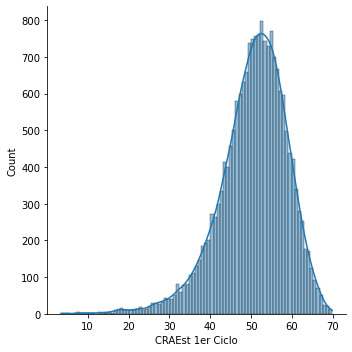

In [22]:
unis = uni[uni['CRAEst 1er Ciclo']>0][uni['CRAEst 1er Ciclo']<=70][cond_its | cond_po]
filter_data = unis.dropna(subset=['CRAEst 1er Ciclo'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['CRAEst 1er Ciclo'], kde=True)

Ahora prepararemos filtros para hacer el análisis a nivel de unidad

In [34]:
display({unis[cond_egl].size, unis[cond_egc].size, unis[cond_fau].size})
#Vemos cuantas observaciones tendríamos en cada tipo

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\1978426695.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display({unis[cond_egl].size, unis[cond_egc].size, unis[cond_fau].size})


{31914, 453222, 490212}

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\1372263437.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craest_its = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] == 'ITS PUCP', 'CRAEst 1er Ciclo']
D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\1372263437.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craest_noits = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] != 'ITS PUCP ', 'CRAEst 1er Ciclo']


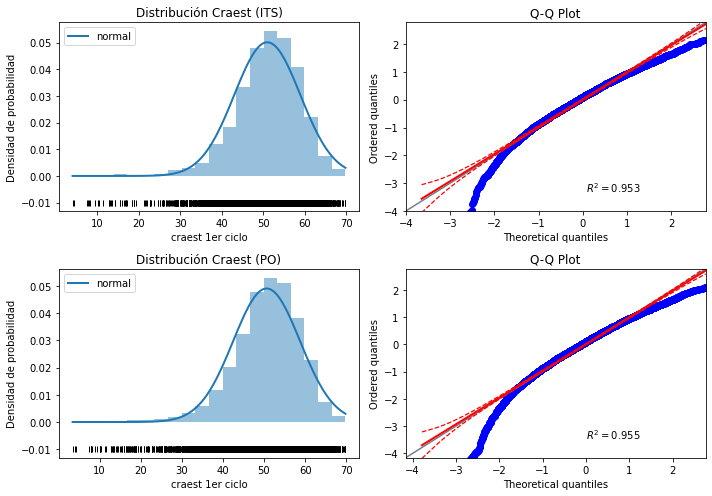

In [35]:
#Análisis de medias para la población ITS y PO que ingresan a EGL

# Gráficos de distribución 
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

craest_its = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] == 'ITS PUCP', 'CRAEst 1er Ciclo']
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(craest_its)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(craest_its), max(craest_its), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=craest_its, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(craest_its, np.full_like(craest_its, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución Craest (ITS)')
axs[0, 0].set_xlabel('craest 1er ciclo')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(craest_its, dist='norm', ax=axs[0, 1])

craest_noits = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] != 'ITS PUCP ', 'CRAEst 1er Ciclo']
mu, sigma = stats.norm.fit(craest_noits)
x_hat = np.linspace(min(craest_noits), max(craest_noits), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=craest_noits, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(craest_noits, np.full_like(craest_noits, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución Craest (PO)')
axs[1, 0].set_xlabel('craest 1er ciclo')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(craest_noits, dist='norm', ax=axs[1, 1])
plt.tight_layout();

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\398036457.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = unis[cond_egl].dropna(subset=['CRAEst 1er Ciclo'])


<Figure size 1008x576 with 0 Axes>

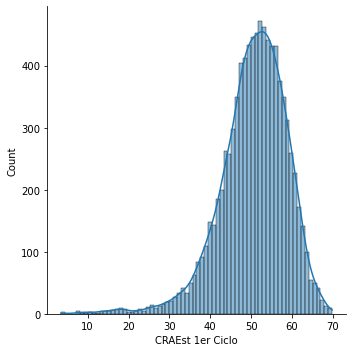

In [36]:
filter_data = unis[cond_egl].dropna(subset=['CRAEst 1er Ciclo'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['CRAEst 1er Ciclo'], kde=True)

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\170788476.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = unis[cond_egl][cond_po].dropna(subset=['CRAEst 1er Ciclo'])


<Figure size 1008x576 with 0 Axes>

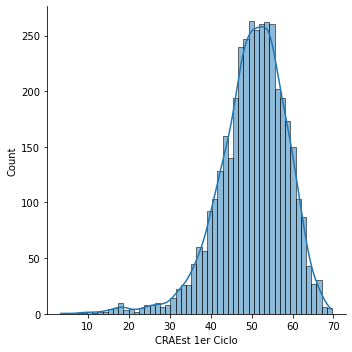

In [37]:
filter_data = unis[cond_egl][cond_po].dropna(subset=['CRAEst 1er Ciclo'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['CRAEst 1er Ciclo'], kde=True)

In [87]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=unis, dv='CRAEst 1er Ciclo', group='MODALIDAD DE INGRESO')

D:\Users\u_dae\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Users\u_dae\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Users\u_dae\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
EVALUACIÓN DEL TALENTO Y EXONERADOS,0.955596,0.000000e+00,False
INGRESO POR CONVENIO COLEGIOS FE Y ALEGRÍA,0.945745,2.997406e-06,False
INGRESO R.P. JORGE DINTILHAC SS.CC.,0.918278,1.236459e-09,False
PRIMERA OPCIÓN,0.961693,7.656695e-42,False
ITS PUCP,0.966044,2.382207e-44,False
CEPREPUC,0.954274,7.746671e-34,False
CEPREPUC-ITS,0.960991,1.836207e-11,False
CEPU UPCH,0.820894,4.354980e-05,False
BECAS COAR,0.917959,4.907828e-01,True
DIPLOMAS DE BACHILLERATO PUCP,0.917850,4.384148e-27,False


In [39]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
craest_its = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] == 'ITS PUCP', 'CRAEst 1er Ciclo']
craest_po = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] != 'ITS PUCP', 'CRAEst 1er Ciclo']

pg.ttest(x=craest_its, y=craest_noits, alternative='two-sided', correction=False)

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\2226390239.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craest_its = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] == 'ITS PUCP', 'CRAEst 1er Ciclo']
D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\2226390239.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craest_po = unis[cond_egl].loc[unis[cond_egl]['MODALIDAD DE INGRESO'] != 'ITS PUCP', 'CRAEst 1er Ciclo']


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.40239,14198,two-sided,0.016301,"[0.06, 0.62]",0.041983,0.352,0.670857


Dado que p-value (0.0163) es menor que el nivel de significancia alpha (0.05), se dispone de evidencia suficiente para considerar que existe una diferencia real entre el craest promedio de estudiantes ITS y de estudiantes PO

In [41]:
 unis[cond_egl & cond_its]['CRAEst 1er Ciclo'].describe()

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\1014433210.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unis[cond_egl & cond_its]['CRAEst 1er Ciclo'].describe()


count    5122.000000
mean       50.966941
std         7.958952
min         4.040000
25%        46.680000
50%        51.730000
75%        56.410000
max        69.780000
Name: CRAEst 1er Ciclo, dtype: float64

In [42]:
 unis[cond_egl & cond_po]['CRAEst 1er Ciclo'].describe()

D:\Users\u_dae\AppData\Local\Temp\ipykernel_16300\320815051.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unis[cond_egl & cond_po]['CRAEst 1er Ciclo'].describe()


count    3956.000000
mean       50.189689
std         8.323600
min         3.450000
25%        45.727500
50%        50.950000
75%        55.832500
max        69.650000
Name: CRAEst 1er Ciclo, dtype: float64